In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./benglore_house_prices.csv")
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13230,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1590,3.0,2.0,57.0
3664,Super built-up Area,Ready To Move,Rajarajeshwari Nagara,3 BHK,NaN,2000,3.0,2.0,85.0
6698,Super built-up Area,Ready To Move,NGR Layout,1 BHK,DSestre,907,1.0,1.0,38.0
10604,Super built-up Area,Ready To Move,Electronic City Phase II,1 BHK,Srrlsnu,650,1.0,1.0,35.0
5313,Built-up Area,Ready To Move,Rajaji Nagar,2 BHK,Brway G,1440,2.0,2.0,170.0


In [3]:
df.shape

(13320, 9)

In [4]:
df.drop(["availability" , "area_type" ,"society" , "balcony"] , axis=1 , inplace=True)

In [5]:
df.sample(3)

,location,size,total_sqft,bath,price
3454,Benson Town,2 BHK,1480,2.0,120.0
6050,NTI Layout,2 BHK,1200,2.0,52.5
6342,Ambalipura,4 BHK,3300,4.0,329.0


In [6]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df["bhk"] = df["size"].apply(lambda x : int(x.split(" ")[0]))

In [25]:
df.sample(5)

,location,size,total_sqft,bath,price,bhk
6443,Whitefield,3 Bedroom,1200.0,3.0,68.4,3
7945,Ulsoor,5 Bedroom,1200.0,4.0,150.0,5
10676,Whitefield,2 BHK,1130.0,2.0,36.0,2
1301,Kalkere,2 BHK,925.0,2.0,48.0,2
799,Tumkur Road,3 BHK,1779.0,3.0,112.0,3


In [10]:
def fix_total_sqft(x):
    a = x.split("-")
    if len(a) == 2:
        return (float(a[1]) + float(a[0]))/2
    try:
        return float(x)
    except:
        return None

In [11]:
df["total_sqft"] = df["total_sqft"].apply(fix_total_sqft)

In [12]:
df.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [26]:
df2 = df.copy()

In [27]:
df2["price_per_sqft"] = (df2["price"]*100000)/df2["total_sqft"]

In [28]:
df2.sample(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1403,Judicial Layout,3 BHK,1300.0,3.0,64.0,3,4923.076923
911,Thubarahalli,4 Bedroom,3800.0,4.0,239.0,4,6289.473684
2898,Varthur,2 BHK,977.0,2.0,36.0,2,3684.749232


In [29]:
df2.location.nunique()

1304

In [30]:
df2.location = df2.location.apply(lambda x : x.strip())

In [31]:
location_count = df2.groupby("location")["location"].agg("count")

In [32]:
location_count

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [33]:
type(location_count)

pandas.core.series.Series

In [34]:
less_than_10 = location_count[location_count <= 10]

In [35]:
less_than_10.count()

1052

In [36]:
df2["location"] = df2["location"].apply(lambda x : "other_location" if x in less_than_10 else x)

In [37]:
df2.location.nunique()

242

In [38]:
df2.sample(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9163,other_location,2 BHK,1275.0,2.0,105.0,2,8235.294118
5992,Tumkur Road,3 BHK,1459.0,2.0,110.0,3,7539.410555
12588,Nagarbhavi,3 Bedroom,1200.0,3.0,228.0,3,19000.000000
3658,Hosakerehalli,2 BHK,1304.0,2.0,100.0,2,7668.711656


In [39]:
df2.shape

(13246, 7)

In [42]:
df2 = df2[~(df2["total_sqft"]/df2["bhk"] < 300)]

In [43]:
df2.shape

(12502, 7)

(array([1.0945e+04, 1.2610e+03, 1.8300e+02, 5.2000e+01, 5.0000e+00,
        4.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   267.82981328,   9077.96773438,  17888.10565549,  26698.24357659,
         35508.38149769,  44318.51941879,  53128.65733989,  61938.79526099,
         70748.93318209,  79559.07110319,  88369.20902429,  97179.34694539,
        105989.48486649, 114799.62278759, 123609.76070869, 132419.89862979,
        141230.03655089, 150040.17447199, 158850.31239309, 167660.45031419,
        176470.58823529]),
 <BarContainer object of 20 artists>)

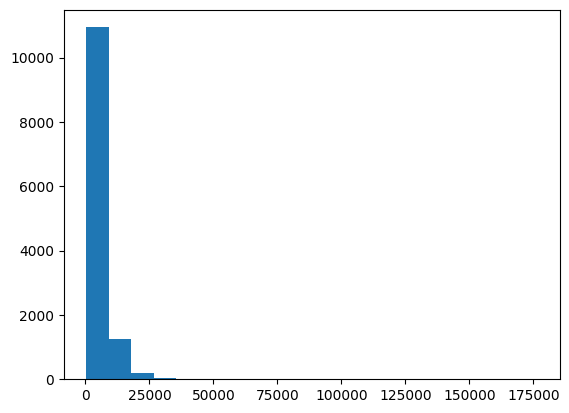

In [50]:
plt.hist(df2["price_per_sqft"] , bins=20 , rwidth=20)

In [51]:
def remove_per_sqft(df):
    df_out = pd.DataFrame()
    for loca , sub_df in df.groupby("location"):
        m = sub_df["price_per_sqft"].mean()
        st = sub_df["price_per_sqft"].std()
        temp = sub_df[(sub_df["price_per_sqft"] >(m-st)) & (sub_df["price_per_sqft"] <= (m+st))  ]
        df_out = pd.concat([df_out , temp] , ignore_index=True)
    return df_out    

In [52]:
df3 = remove_per_sqft(df2)

In [53]:
df3.shape

(10291, 7)

In [54]:
df3.bhk.max()

16

In [55]:
df3.bhk.min()

1

In [56]:
def plot_scatterplot(df , location):
    df1 = df[(df["location"] == location)&(df["bhk"] == 2)]
    df2 = df[(df["location"] == location)&(df["bhk"] == 3)]
    plt.scatter(df1.total_sqft , df1.price , c="red" , marker=".")
    plt.scatter(df2.total_sqft , df2.price , c="green" , marker="*")
    plt.xlabel("total Sqr. feet")
    plt.ylabel("price")

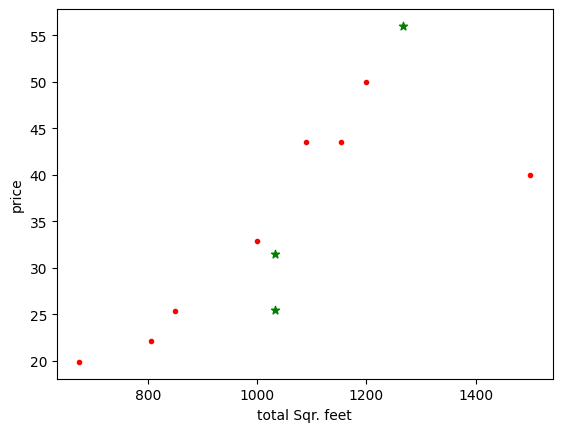

In [57]:
plot_scatterplot(df3 ,"Dommasandra" )

In [58]:
def remove_per_bhk(df):
    exclude_index = np.array([])
    for loc , df_loc in df.groupby("location"):
        bhk_dic = {}
        for bhk , df_bhk in df_loc.groupby("bhk"):
            bhk_dic[bhk] = {
                "mean":np.mean(df_bhk.price_per_sqft),
                "count" :df_bhk.shape[0]
            }
        for bhk, df_bhk in df_loc.groupby("bhk"):
            curr = bhk_dic.get(bhk-1)
            if curr:
                exclude_index = np.append(exclude_index , df_bhk[df["price_per_sqft"] <(curr["mean"]) ].index.values)
                
    return df.drop(exclude_index)        
        

In [59]:
df4 = remove_per_bhk(df3)
df4.shape

C:\Users\kulde\AppData\Local\Temp\ipykernel_1696\444315550.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_index = np.append(exclude_index , df_bhk[df["price_per_sqft"] <(curr["mean"]) ].index.values)
C:\Users\kulde\AppData\Local\Temp\ipykernel_1696\444315550.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_index = np.append(exclude_index , df_bhk[df["price_per_sqft"] <(curr["mean"]) ].index.values)
C:\Users\kulde\AppData\Local\Temp\ipykernel_1696\444315550.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_index = np.append(exclude_index , df_bhk[df["price_per_sqft"] <(curr["mean"]) ].index.values)
C:\Users\kulde\AppData\Local\Temp\ipykernel_1696\444315550.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_index = np.append(exclude_index , df_bhk[df["price_per_sqft"] <(curr["mean"]) ].index.values)
C:\Users\kulde\A

(6213, 7)

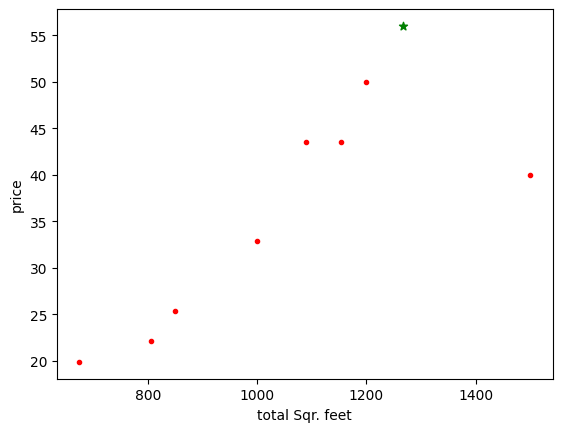

In [60]:
plot_scatterplot(df4 ,"Dommasandra" )

(array([3.803e+03, 1.674e+03, 6.220e+02, 7.600e+01, 2.900e+01, 6.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

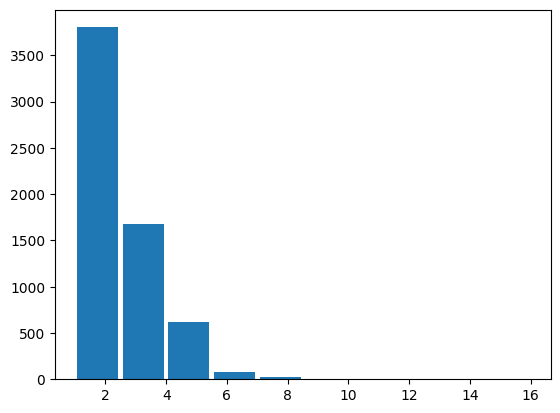

In [61]:
plt.hist(df4["bath"] , rwidth=0.9)

In [62]:
df4[df4["bath"] > (df4["bhk"]+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5273,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6756,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8461,other_location,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [63]:
df5 = df4[df4["bath"] < (df4["bhk"]+2)]

In [64]:
df5.shape

(6137, 7)

In [65]:
df5.drop(["size" , "price_per_sqft"] , axis=1 , inplace=True)

C:\Users\kulde\AppData\Local\Temp\ipykernel_1696\3222125182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(["size" , "price_per_sqft"] , axis=1 , inplace=True)


In [66]:
df5.shape

(6137, 5)

In [67]:
loc = pd.get_dummies(df5["location"] )

In [68]:
loc

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other_location
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df6 = df5.drop("location" , axis=1)
df6 = pd.concat([df6  ,loc] , axis=1)

In [71]:
df6.shape

(6137, 246)

In [72]:
df6.sample(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other_location
6869,1020.0,3.0,110.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1784,1417.0,2.0,76.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df6.drop("other_location" , axis=1 , inplace=True)
df6.shape

(6137, 245)

In [74]:
X = df6.drop("price" , axis=1)

In [75]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X.values , df6["price"] , test_size=0.2)

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5 , test_size=0.2)
# cross_val_score(LinearRegression() , X , df6["price"] , cv=cv)

In [79]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
               
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X , df6["price"] )

,model,best_score,best_params
0,linear_regression,0.856653,{}
1,lasso,0.719856,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.741148,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [82]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [83]:
def predict_price(location , total_sqft , bath , bhk):
    arr = np.zeros(len(X.columns))
    a = np.where( X.columns == location)[0]
    arr[0] = total_sqft
    arr[1] = bath
    arr[2] = bhk
    if len(a) == 1:
        arr[a[0]] = 1
    return model.predict([arr])[0]    

In [84]:
predict_price('1st Block ',2850.0, 4.0, 4)

235.07339777382734

In [85]:
import pickle
with open('price_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))